# Flight Data Analysis & Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1=pd.read_csv('Clean_Dataset.csv')

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [4]:
df1.shape

(300153, 12)

In [5]:
#remove the first column which is just a index no
df1=df1.drop(['Unnamed: 0'],axis=1)

In [6]:
#now chcek for unique values for category column
df1['airline'].unique()



array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [7]:
df1['source_city'].unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [8]:
df1['destination_city'].unique()
df1['class'].unique()

array(['Economy', 'Business'], dtype=object)

In [14]:
#now make a new column of to & fro
df1['journey']=df1['source_city'] +':'+df1['destination_city']

In [15]:
df1

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,journey
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,Delhi:Mumbai
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,Delhi:Mumbai
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,Delhi:Mumbai
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,Delhi:Mumbai
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,Delhi:Mumbai
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,Chennai:Hyderabad
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,Chennai:Hyderabad
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,Chennai:Hyderabad
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,Chennai:Hyderabad


# Data Visualization

(array([  9011.,      0.,  16098.,      0., 127859.,      0.,  23173.,
             0.,  43120.,  80892.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

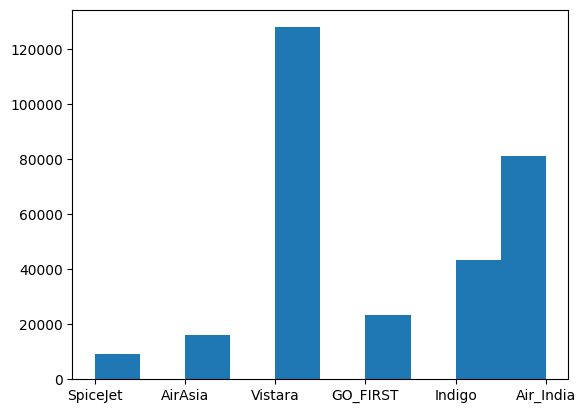

In [9]:
#now as we can see all the category columns are not consist of any duplicate values so we can analyse the data

df1.airline.value_counts()
plt.hist(df1.airline)

#vistara has more flight counts followed by  Air_India & spiceject has less flight counts

In [10]:
#

#sns.catplot(data=df1, x="airline", y="source_city", hue="class", kind="bar")


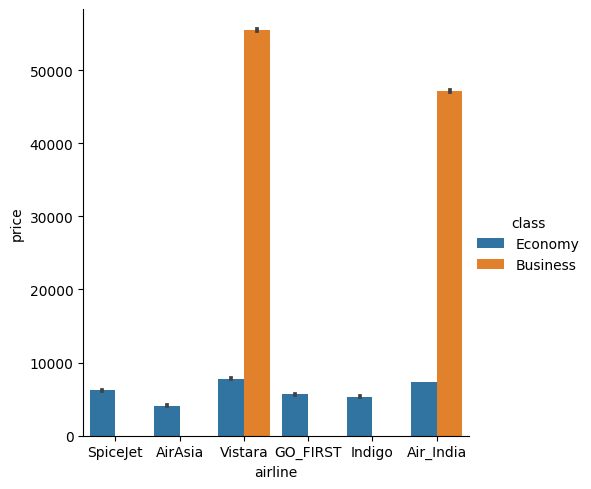

In [66]:
#Flight vs Price
sns.catplot(data=df1, x="airline", y="price", hue="class", kind="bar")

#as we can see vistara has higher price in both business & economi class as compared to others

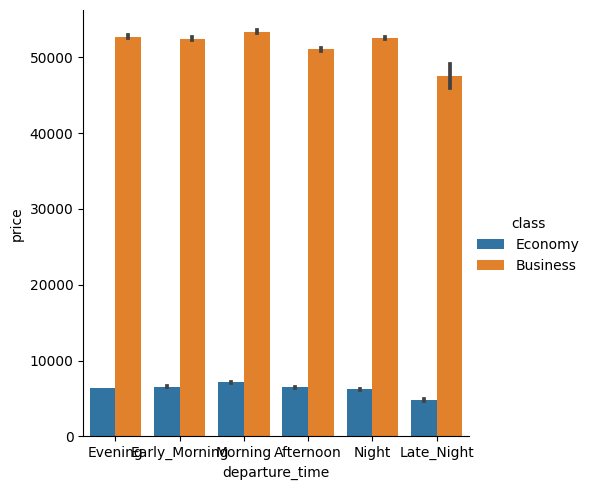

In [11]:
#Departure time vs Price

sns.catplot(data=df1, x="departure_time", y="price", hue="class", kind="bar")

#flight price is comparitively same across all departure time except for late night

<AxesSubplot: xlabel='airline', ylabel='Count'>

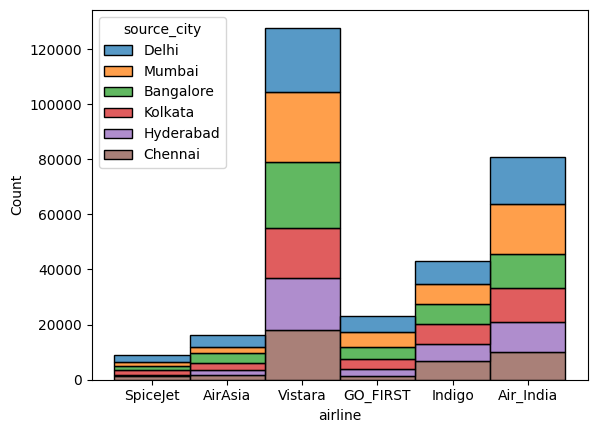

In [72]:
# flight count of airline for each city
sns.histplot(binwidth=0.5, x="airline", hue="source_city", data=df1, stat="count", multiple="stack")

#as we can see vistara has more flight count across all cities

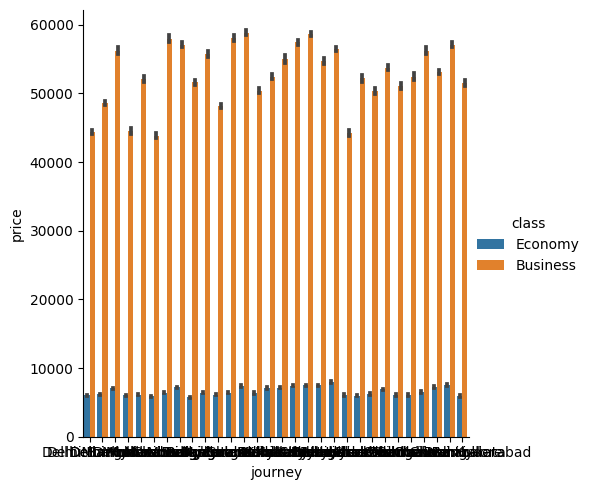

In [20]:
#Journey vs Price
sns.catplot(data=df1, x="journey", y="price", hue="class", kind="bar",)

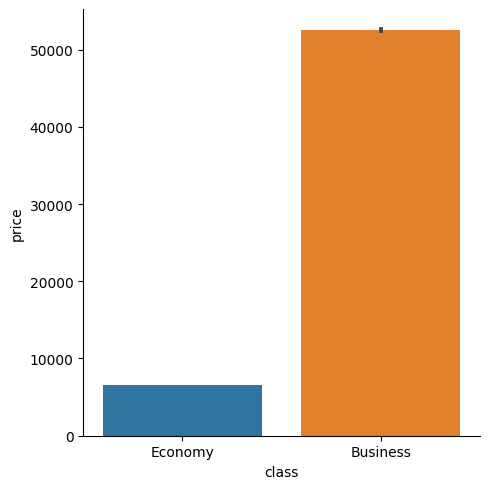

In [23]:
#class vs Price
sns.catplot(data=df1, x="class", y="price", kind="bar")

#business class price is 4 times highr than economy class

# Q&A

In [47]:
#Which is the most expensive flight in both class?



df1.groupby(['airline','class'])['price'].max().sort_values(ascending=False)

#df.groupby(['ID'])['percentage'].max()

airline    class   
Vistara    Business    123071
Air_India  Business     90970
           Economy      42349
Vistara    Economy      37646
SpiceJet   Economy      34158
GO_FIRST   Economy      32803
Indigo     Economy      31952
AirAsia    Economy      31917
Name: price, dtype: int64

In [41]:
#Which are the most expensive flight in both class by destination journey?
df1.groupby(['class','journey'])['price'].max().sort_values(ascending=False)


class     journey            
Business  Kolkata:Delhi          123071
          Delhi:Kolkata          117307
          Hyderabad:Mumbai       115211
          Kolkata:Hyderabad      114705
          Chennai:Mumbai         114704
          Mumbai:Bangalore       114523
          Delhi:Hyderabad        114507
          Mumbai:Chennai         111964
          Bangalore:Delhi        111883
          Mumbai:Delhi           111437
          Kolkata:Mumbai         110936
          Chennai:Bangalore      107597
          Kolkata:Bangalore      105638
          Bangalore:Kolkata      105168
          Chennai:Kolkata        104624
          Delhi:Chennai          104466
          Bangalore:Mumbai       103819
          Chennai:Delhi          103683
          Mumbai:Kolkata         100909
          Mumbai:Hyderabad        99677
          Hyderabad:Bangalore     97767
          Hyderabad:Kolkata       97381
          Delhi:Mumbai            95657
          Hyderabad:Chennai       95208
          

In [45]:
#Which is the cheapest flight by class?
df1.groupby(['airline','class'])['price'].min().sort_values(ascending=True)

airline    class   
AirAsia    Economy      1105
GO_FIRST   Economy      1105
Indigo     Economy      1105
SpiceJet   Economy      1106
Air_India  Economy      1526
Vistara    Economy      1714
Air_India  Business    12000
Vistara    Business    17604
Name: price, dtype: int64

In [49]:
#which flight takes less time to reach by the journey
df1.groupby(['airline','journey'])['duration'].min().sort_values(ascending=True).head(50)

airline    journey            
Indigo     Chennai:Bangalore      0.83
           Bangalore:Chennai      0.83
AirAsia    Bangalore:Chennai      0.92
           Chennai:Bangalore      0.92
           Hyderabad:Bangalore    0.92
Indigo     Chennai:Hyderabad      1.00
GO_FIRST   Hyderabad:Bangalore    1.00
           Chennai:Hyderabad      1.00
           Bangalore:Hyderabad    1.00
Vistara    Bangalore:Hyderabad    1.00
Air_India  Chennai:Bangalore      1.00
           Bangalore:Chennai      1.00
Vistara    Hyderabad:Bangalore    1.00
SpiceJet   Bangalore:Hyderabad    1.00
AirAsia    Bangalore:Hyderabad    1.08
Indigo     Hyderabad:Bangalore    1.08
SpiceJet   Bangalore:Chennai      1.08
Air_India  Hyderabad:Bangalore    1.08
Indigo     Bangalore:Hyderabad    1.08
AirAsia    Chennai:Hyderabad      1.17
Indigo     Hyderabad:Chennai      1.17
Air_India  Mumbai:Hyderabad       1.17
GO_FIRST   Hyderabad:Chennai      1.17
Air_India  Bangalore:Hyderabad    1.25
SpiceJet   Chennai:Hyderabad     

In [50]:
df1

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,journey
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,Delhi:Mumbai
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,Delhi:Mumbai
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,Delhi:Mumbai
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,Delhi:Mumbai
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,Delhi:Mumbai
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,Chennai:Hyderabad
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,Chennai:Hyderabad
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,Chennai:Hyderabad
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,Chennai:Hyderabad
